# ***Lineer Regresyon Varsayimlari***

## ***Sıcaklık Tahmini***

Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/data)'dan indirin.

- Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.

- Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.
---

In [1]:
import pandas as pd
import numpy as np
# grafiksel araclar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn import linear_model
import statsmodels.api as sm

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}

# temiz veri setini dataframe icerisine yukle
weather = pd.read_csv('data/weatherHistory.csv')

In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
# aciklayici degiskenler listesi
expl_vars = ['Humidity',  'Wind Speed (km/h)', 
            'Wind Bearing (degrees)', 'Pressure (millibars)']

# hedef degiskeni
Y = weather['Temperature (C)']
# aciklayici degiskenler
X = weather[expl_vars]

---
### ***Lineer Regresyon Modeli***
***Scikit-Learn Yontemi***

In [4]:
# model nesnesi olusturuldu
lrm = linear_model.LinearRegression()
# modelimizin denklemi (egrisi) olusturuluyor
lrm.fit(X, Y)

# degiskenler ve sabit(bias) degeri
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.926438185285384


---
### ***Varsayim Karsilama Testleri***

***Varsayım 1: Katsayılarda modelin doğrusallığı***

- Model dogrusal regresyon modeli oldugundan doğrusallık varsayımını dikkate alir, bu nedenle varsayım karsilanmaktadir.

***Varsayım 2: Hata terimi ortalamada sıfır olmalıdır***
- Hatanın beklenen değeri sıfırdan farklıysa, modelimiz yanlı/biased hale gelir. Modelinize sabit terimi dahil etmeyi unutursanız bu varsayım yapılmaz. Bu yüzden, modelinize daima bir sabit eklemeniz gerekir.

- Modelde sabit terimi eklediğimizden, modelin hatalarının ortalaması sıfır olacaktir.

In [5]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Ev fiyatlari modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Ev fiyatlari modelinin ortalama hatası : 0.000000000000001


***Varsayım 3: homoscedasticity***

- Hata varyansı, gözlemler(sample) arasında sistematik olarak değişmemelidir. Bu varsayım karşılanmadığı zaman, ***heteroscesdastisity*** ile uğraşırız.

- Modelimizi görselleştirerek heteroscedastisity'den muzdarip olup olmadığını kontrol ederiz.

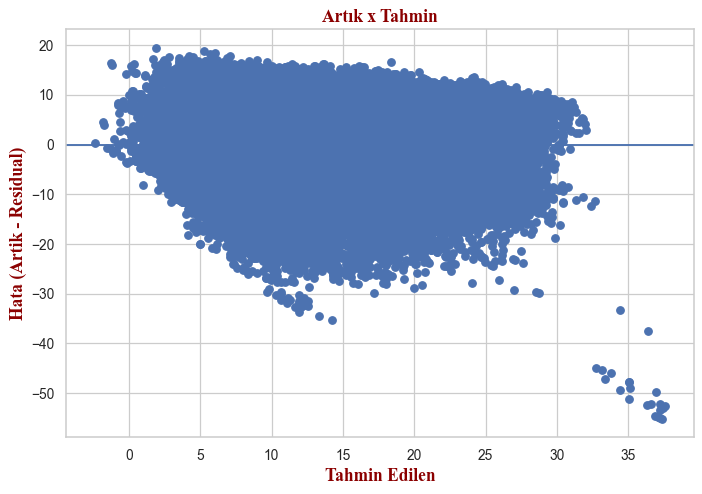

In [6]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=axis_font)
plt.ylabel('Hata (Artik - Residual)', fontdict=axis_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=title_font)
plt.show()

- Hata varyansi kucuk tahmin degerleri icin daha azken, orta tahmin degerlerinde artiyor, buyuk tahmin degerlerinde negatif hata azalip varyans pozitif deger araliginda kaliyor. Duzensiz bir grafik varsayimin karsilanmadigini ifade ediyor.

- Hata terimlerinde heteroscedasticity olup olmadığını belirlemek için kullanabileceğimiz birkaç istatistiksel test vardır: Bartlett ve Levene testleri. Her iki test için de null hipotez, hataların homoscedastic olmasıdır. Yani p degerleri 0.05 den dusukse null hipotez reddedilir.

- Testlerde p < 0.05 oldugundan hatalarımızın heteroscedastic olduğu tespit edildi.

In [7]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


***Varsayım 4: düşük çoklu doğrusallık/low multicollinearity***
- Aciklayici özellikler birbiriyle sadece zayıf bir şekilde ilişkili(korele) olmalı ve ideal olarak tamamen ilişkisiz olmalıdır. 

- Tek amacımız tahminse bu bir sorun degildir, çünkü önemli olan, hedef degiskendeki varyansın açıklanmasıdır. Multicollinearity tahminimi etkilemez.

- Ancak, bir sonucu tahmin ederken en çok hangi özelliklerin önemli olduğunu bilmek istersek(mesela hangi reklam - tv,internet, radyo,gazete - satislari artirdi), çoklu-doğrusallık(multicollinearity), aciklayici özellikler ve hedef degisken (sonuçlar) arasındaki ilişkiyi dikkate almamiza engel olur. Yani bir degiskenin katsayisi yuksek diye cok etkiliyor cikarimi yapamayiz. Ya da degiskenlerin ayri ayri etkisi hakkinda cikarim yapamayiz.

- Çoklu doğrusallığı saptamak için, özelliklerin korelasyon matrisine bakabiliriz. Bu matriste 1 ya da -1 korelasyon perfect multicollinearity var demektir ve bu varsayimin ihlali anlamina gelir. Korelasyon >0.8 in uzerindeyse ciddi(severe) multicollinearity mevcuttur.

- Çoklu doğrusallık giderme: 
    - degiskenleri donusturerek(gdp ve population degiskenlerini gdp per capita ile birlestirme), 
    - PCA ile, 
    - ilişkili bazı özelliklerin atılmasıyla (weight in pounds, weight in kgs dan birini kullan) yapilabilir.

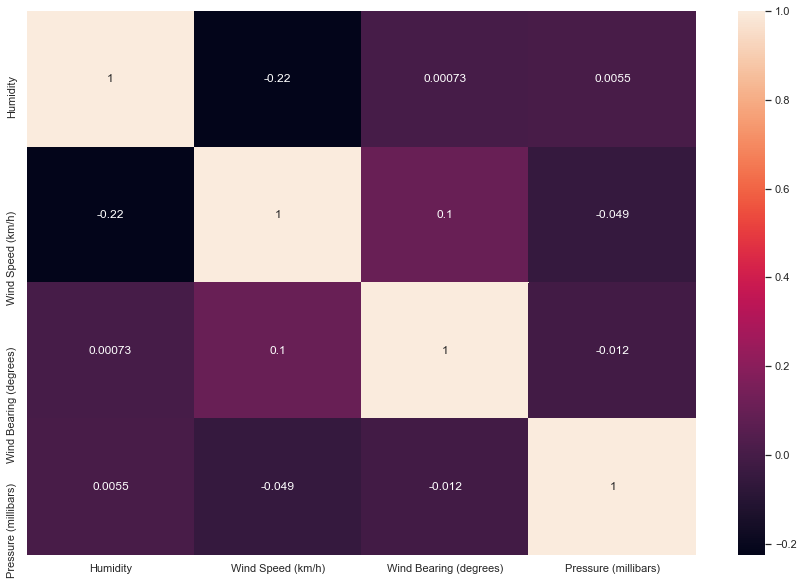

In [9]:
# korelasyon grafigi cizilir
corr_matrix = weather[expl_vars].corr()
plt.figure(figsize=(15,10))
x = sns.heatmap(corr_matrix, annot=True)

- $r=0.1$ korelasyon degerleri cok dusuk multicollinearity anlamina gelir.

***Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır***

- Bir gözlem için hata, bir diğer gozlemin hatasini öngörmemelidir. 

- Hatalarin birbiriyle korele olup olmadığını belirlemek için bunları grafik olarak çizebiliriz. Grafikte rasgelelik olmalidir.

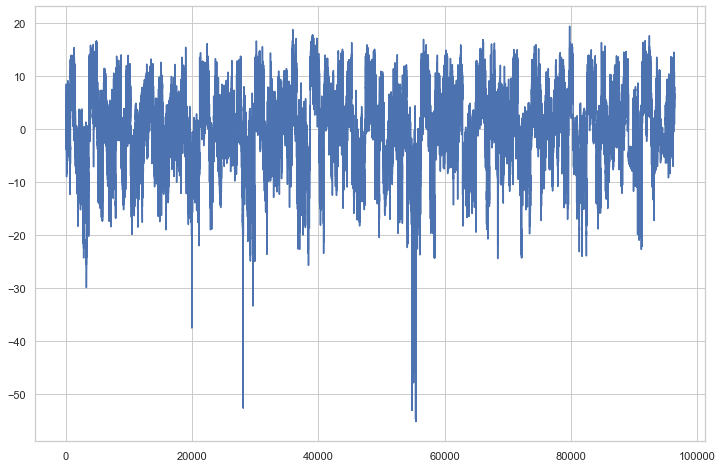

In [10]:
plt.figure(figsize=(12,8))
plt.plot(hatalar)
plt.show()

- Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu ```acf``` kullanmaktır. Bu fonksiyon, bir değişkenin kendi ile korelasyonunu hesaplar

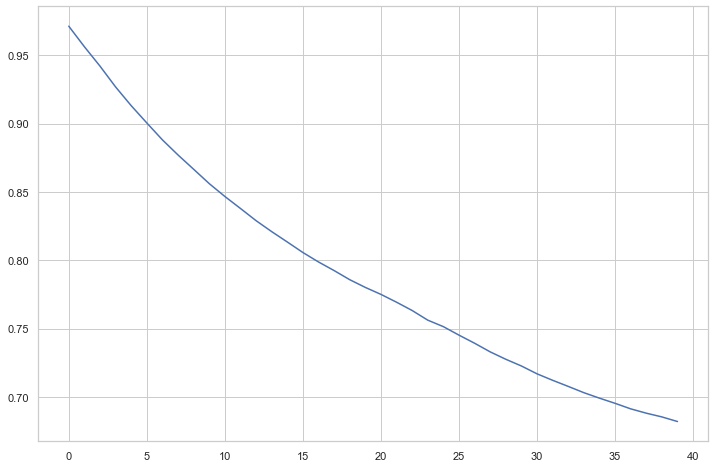

In [11]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(12,8))
plt.plot(acf_data[1:])
plt.show()

- Modelimizin hataları arasındaki otokorelasyon çok yuksektir (0.95 ile 0.7 arasında).

***Varsayım 6: özellikler hatalarla korele olmamalıdır***

- En önemli varsayım: açıklayıcı değişkenler ve hatalar bağımsız olmalıdır. Bu varsayım geçerli değilse, katsayıların tahminleri yanlı olacağından, modelin tahminleri güvenilmez olacaktır. Bu varsayım ***dışsallık/exogeneity*** olarak da bilinir.

***Hatalarin normalligi***

- OLS'nin bir doğrusal regresyon modeline uygulanması için hataların normalliği gerekmemektedir, fakat tahmin edilen katsayılarımızın istatistiksel anlamlılığını ölçmek için, hata terimleri normal olarak dağıtılmalıdır. 

- Çoğu zaman, normal olarak dağıtılmamış hatalar ihmal edilen değişkenlerden kaynaklanır. Bu nedenle, modele ihmal edilen ilgili özellikleri eklemek sorunun düzeltilmesine yardımcı olabilir. Bazen bağımlı değişkeni dönüştürmek de yardımcı olur.

- Hata koşullarının normalliğini kontrol etmek için çeşitli yollar vardır. Bunu yapmanın bir yolu, QQ çizimindeki hataları görselleştirmek veya histograma bakmaktır.

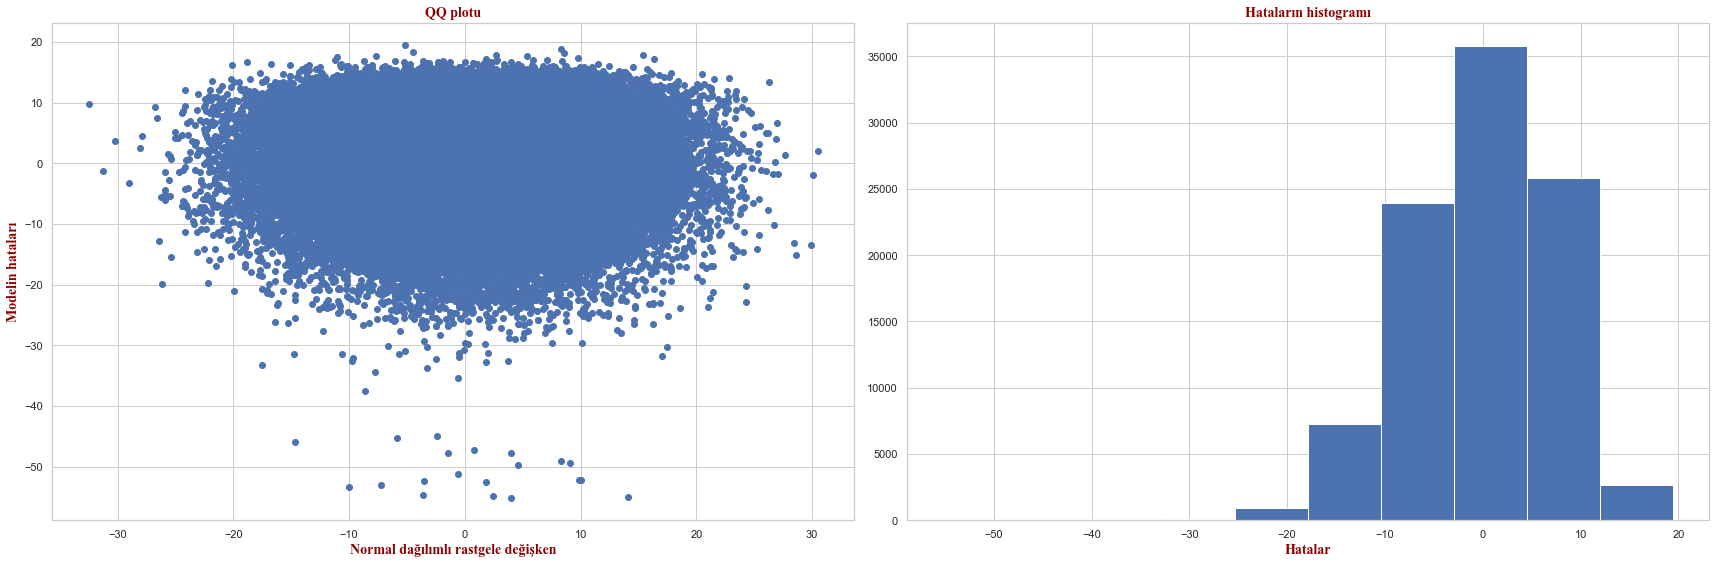

In [12]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=axis_font)
plt.ylabel("Modelin hataları", fontdict=axis_font)
plt.title("QQ plotu", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=axis_font)
plt.title("Hataların histogramı", fontdict=title_font)

plt.tight_layout()
plt.show()

- Yukarıdaki grafiklerde görüldüğü gibi, hatalarımız normal olarak dağıtılmamaktadır.

- Diger yontem Jarque Bera testi ve normal test, Her iki testin null hipotezi, hataların normal olarak dağıldığını belirtir. p<0.05 ise normal degildir.


In [13]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3793.296735252353 ve p değeri : 0.0
Normal test değeri      : 3375.4323076995734  ve p değeri : 0.000000000000000000000000000000


- Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.

---
***Karsilanmayan Varsayimlar***

Varsayim                                 |  Karsilanma Durumu | Yorum
---------------------------------        | -----------------  | ---- 
Katsayılarda modelin doğrusallığı        | Evet               | 
Hata terimi ortalamada sıfır olmalı      | Evet               |
Homoscedasticity (hata varyansı duzenli) | Hayir              | aykiri degerlerden kaynaklanabilir
Düşük multicollinearity                  | Evet               |
Hata terimleri birbiriyle ilişkisiz      | Hayir              | ihmal edilen değişkenlerden kaynaklanabilir
Ozellikler hatalarla korele olmamali     | Test edilemedi     |
Hata dagilimi normal                     | Hayir              | ihmal edilen değişkenlerden kaynaklanabilir
